# Digit Recognition using Neural Networks

**Title: Digit Recognition Project**  
**Name of Student:** Charles Timmer  
**Date:** 23/10/2024  

**The Process:**

- **Data Loading**: *Load the MNIST dataset, which consists of handwritten digit images and their corresponding labels, divided into training and testing sets.

- **Data Inspection**: *Check the shapes and types of the dataset to confirm it contains 28x28 grayscale images and their corresponding labels.

- **Data Visualization**: *Visualize individual images from the dataset and plot a grid of sample images from each digit class to understand the distribution.

- **Data Scaling**: *Normalize the pixel values of the images by scaling them between 0 and 1, which helps improve the model’s training performance.

- **Model Building**: *Construct a Convolutional Neural Network (CNN) with an input layer, convolutional layers, pooling layers, and fully connected dense layers to process and classify the images.

- **Model Compilation**: *Compile the model using the Adam optimizer, sparse categorical cross-entropy loss function, and accuracy as the evaluation metric.

- **Model Training**: *Train the model on the training dataset for 10 epochs to learn patterns and features from the digit images.

- **Model Evaluation**: *Evaluate the model’s performance on the test dataset by calculating the loss and accuracy metrics.

- **Prediction and Confusion Matrix**: *Make predictions on the test dataset, compute a confusion matrix, and visualize it using a heatmap to assess classification performance.

- **Model Saving and Loading**: *Save the trained model to a file and load it later for reuse, allowing deployment in real-world applications.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix


In [2]:
!pip install opencv-python

     -------------------------------------- 38.8/38.8 MB 982.3 kB/s eta 0:00:00


## Loading the MNIST Dataset

In [2]:
# Loading the MNIST dataset into training and testing sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

## Data Inspection

In [3]:
# Checking the type of the training dataset (X_train)
type(X_train)

numpy.ndarray

In [4]:
# Printing the shapes of the training and testing datasets
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


## Image Visualization

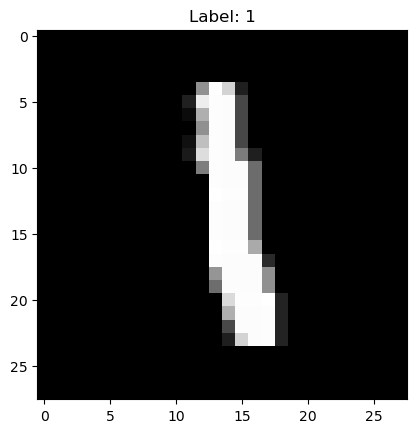

In [5]:
# Visualizing a single sample image from the training dataset

plt.imshow(X_train[6], cmap='gray')  
plt.title(f"Label: {Y_train[6]}")   
plt.show()                             


### Collecting and Visualizing the First 10 Images of Each Digit Class

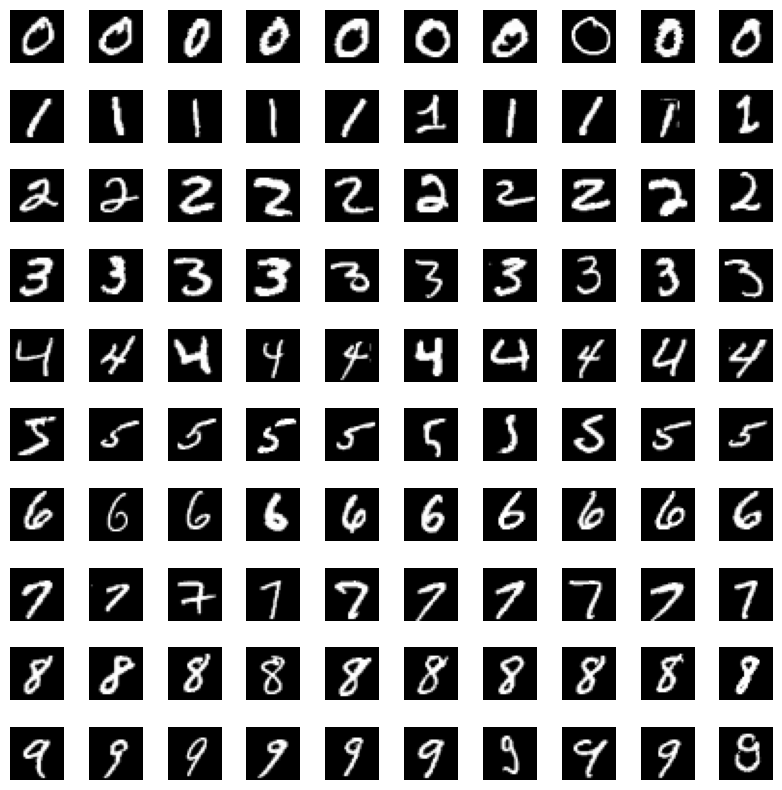

In [6]:
# Initialize a dictionary to hold the first 10 images of each class (0-9)
class_images = {i: [] for i in range(10)}

# Iterate through the training dataset
for i, (image, label) in enumerate(zip(X_train, Y_train)):
    if len(class_images[label]) < 10:
        class_images[label].append(image)
    # Stop once we have 10 images for each class
    if all(len(images) == 10 for images in class_images.values()):
        break

# Plot the images
fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(10, 10))
plt.subplots_adjust(hspace=0.5)

# Display the first 10 images of each class
for i in range(10):  # For each digit (0-9)
    for j in range(10):  # For each of the first 10 images of that digit
        axes[i, j].imshow(class_images[i][j], cmap='gray')
        axes[i, j].axis('off')
        if j == 0:
            axes[i, j].set_ylabel(f'Digit {i}', rotation=0, labelpad=30, fontsize=10)

plt.show()

In [7]:
# Printing the pixel values of the image at index 6 from the training dataset
print(X_train[6])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 145 255 211  31   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  32 237 253 252  71   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  11 175 253 252  71   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 144 253 252  71   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  16 191 253 252  7

In [22]:
print(X_train[1].shape)

(28, 28)


## Image Levels

In [24]:
print(Y_train.shape,Y_test.shape)

(60000,) (10000,)


In [25]:
#Unique values in Y_train
print(np.unique(Y_train))
#unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


## Data Scaling

In [8]:
# Scaling the pixel values of the training and testing datasets to the range [0, 1]
X_train = X_train / 255 
X_test = X_test / 255    

In [9]:
print(X_train[6])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

# Building the Neural Network Model

***This section creates a convolutional neural network (CNN) using Keras, which is well-suited for image classification tasks***.

In [38]:
# Constructing a sequential model for digit recognition
model = keras.Sequential([
    keras.layers.Input(shape=(28, 28, 1)),  # Input layer for 28x28 grayscale images
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),  # Convolutional layer with 32 filters
    keras.layers.MaxPooling2D(pool_size=(2, 2)),  # Max pooling layer to reduce dimensionality
    keras.layers.Flatten(),  # Flattening the 2D output to a 1D vector
    keras.layers.Dense(128, activation='relu'),  # Fully connected hidden layer with 128 neurons
    keras.layers.Dense(10, activation='softmax')  # Output layer for 10 classes (digits 0-9)
])


In [41]:
# Compiling the model with specified optimizer, loss function, and evaluation metric
model.compile(optimizer='adam',  # Using the Adam optimizer
              loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification
              metrics=['accuracy'])  # Tracking accuracy as a performance metric

# Training the model on the training dataset for a specified number of epochs
model.fit(X_train, Y_train, epochs=10)  # Fitting the model for 10 epochs


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 190s 90ms/step - accuracy: 0.9105 - loss: 0.3011
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 215s 103ms/step - accuracy: 0.9821 - loss: 0.0568
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 236s 120ms/step - accuracy: 0.9894 - loss: 0.0335
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 208s 91ms/step - accuracy: 0.9934 - loss: 0.0206
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 187s 83ms/step - accuracy: 0.9959 - loss: 0.0127
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 210s 87ms/step - accuracy: 0.9970 - loss: 0.0099
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 228s 100ms/step - accuracy: 0.9970 - loss: 0.0086
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 203s 100ms/step - accuracy: 0.9983 - loss: 0.0049
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 198s 98ms/step - accuracy: 0.9974 - loss: 0.0073
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 320s 160ms/step - accuracy: 0.9986 - loss: 0.0045


## Evaluating the Model

In [46]:
import pandas as pd  # Importing pandas for data handling

# Evaluating the model on the test dataset
loss, accuracy = model.evaluate(X_test, Y_test)

# Creating a DataFrame to display the results
results = pd.DataFrame({
    'Metric': ['Loss', 'Accuracy'],
    'Value': [loss, accuracy]
})

# Printing the results in table form
print(results)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.9813 - loss: 0.0946
     Metric    Value
0      Loss  0.06985
1  Accuracy  0.98550


## Making Predictions and Plotting the Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step


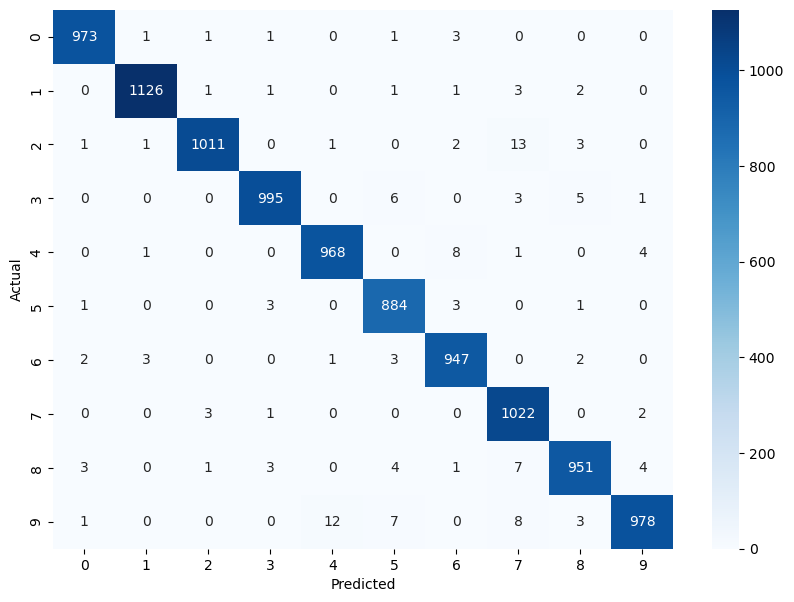

In [43]:
# Get predictions
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Compute confusion matrix
cm = confusion_matrix(Y_test, Y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


***Ready for Deploymenrt***

In [44]:
# Save the model
model.save('mnist_model.keras')

## THANK YOU